In [1]:
import pandas  as pd
import numbers as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [11]:
df_retail = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")
df_retail.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
df_retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Mô tả dữ liệu: 
1. Giá trung bình của một sản phẩm là ~ 4.61 và giá trị trung bình số lượng là ~ 9.55
2. Độ lệnh chuẩn của giá sản phẩm là ~ 96.76 và độ lệnh chuẩn là 218.1 => Lệnh rất lớn so với giá trị trung bình
3. Giá trị min của giá sản phẩm là -11062.06 và min của  số lượng là -80995 => Xuất hiện giá trị âm. lệch xa giá trị trung bình.
4. Giá trị max của giá sản phẩm là 38970 và max của giá trị sản phẩm là 80995 => Giá trị max là rất lớn, lệch xa giá trị trung bình và độ lệch chuẩn
5. 25% dữ liệu có giá của sản phẩm nhỏ hơn hoặc bằng 1.25 => nhỏ và khá gấn với giá trị trung bình.
    25% dữ liệu có số lượng nhỏ hơn hoặc bằng 1 => nhỏ và lệch gần so với giá trị trung bình
6. 50% dữ liệu có giá của sản phẩm nhỏ hơn hoặc bằng 2.08 => nhỏ và khá gấn với giá trị trung bình.
    50% dữ liệu có số lượng nhỏ hơn hoặc bằng 3 => nhỏ và lệch gần so với giá trị trung bình
7. 75% dữ liệu có giá của sản phẩm nhỏ hơn hoặc bằng 4.13 => nhỏ và gấn với giá trị trung bình.
    75% dữ liệu có số lượng nhỏ hơn hoặc bằng 10 => nhỏ và gần so với giá trị trung bình

In [14]:
df_retail.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [18]:
df_retail_dropna= df_retail.dropna(axis='columns')

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,France
541905,581587,22899,6,12/9/2011 12:50,2.10,France
541906,581587,23254,4,12/9/2011 12:50,4.15,France
541907,581587,23255,4,12/9/2011 12:50,4.15,France


In [32]:
df_drop = df_retail.dropna()

In [43]:
df_drop.shape[0] 


406829

In [44]:
100* (df_drop.shape[0] /df_retail.shape[0])

75.0733056657114

NHẬN XÉT DỮ LIỆU: 
1. Dữ liệu có 8 cột và 541909 dòng
2. Dữ liệu có cột Description và CustomerID chứa giá trị NA
3. Dữ liệu có 406829 dòng chưa giá trị Na chiếm ~ 75% => số lượng NA là rất lớn không nên loại bỏ


In [47]:
df_retail["Description"].fillna("Không biết")

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

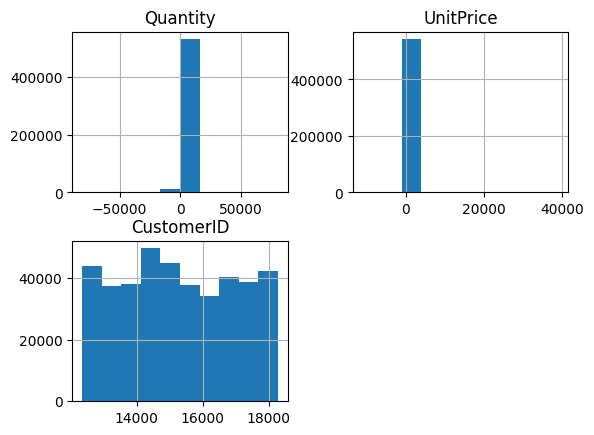

In [49]:
df_retail.hist()

In [63]:
df_retail_outlier = df_retail[(df_retail['UnitPrice'] <= 0) | (df_retail['Quantity'] <0)]
df_retail_outlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [64]:
df_retail_nomarl = df_retail[(df_retail['UnitPrice'] > 0) & (df_retail['Quantity'] >=0)]
df_retail_nomarl

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

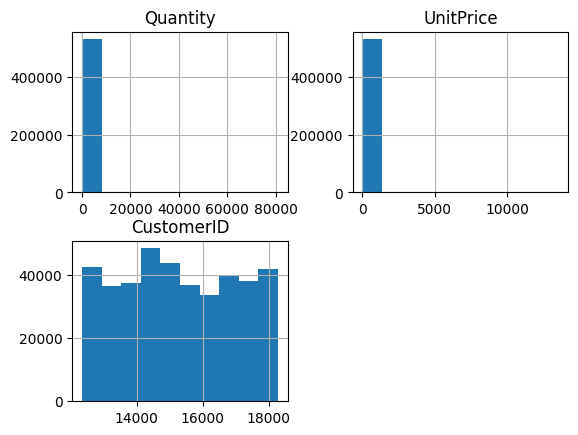

In [65]:
df_retail_nomarl.hist()

In [66]:
df_retail_nomarl.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


Nhận xét dữ liệu không chưa giá trị ngoại lai
1. Giá trị trung bình của giá sản phẩm là 3.907
2. Độ lệnh chuẩn dữ liệu giá sản phẩm là 35.9 cách xa giá trị trung bình, nhưng giảm đáng kể so với giá trị ban đâu
3. Giá trị Min của giá sản phẩm là 0.001 => Lệch tương đối gần với giá trị trung bình
4. Giá trị Max của giá trị sản phẩm là 13541.33 => lệch xa giá trị trung bình và độ lệnh chuẩn.
5. 25% dữ liệu có giá của sản phẩm nhỏ hơn hoặc bằng 1.25 => nhỏ và khá gấn với giá trị trung bình.
6. 50% dữ liệu có giá của sản phẩm nhỏ hơn hoặc bằng 2.08 => nhỏ và khá gấn với giá trị trung bình.
7. 75% dữ liệu có giá của sản phẩm nhỏ hơn hoặc bằng 4.13 => nhỏ và khá gấn với giá trị trung bình.

==> Sau khi xử lý giá trị ngoại lai Quantiy >1 và UnitPrice >1 thì dữ liệu vẫn còn giá trị ngoại lại
Số lượng max đang khá lớn, lệnh xa với giá trị trung bình, và vượt 3 lần giá trị độ lệch chuẩn
==> Cần xử lý thêm